# Lotka-Volterra - An Equation-based System Dynamics Approach

A worked example of how to use ordinary differential equations to simulate a predator-prey model.

Example largely taken from [here](https://scientific-python.readthedocs.io/en/latest/notebooks_rst/3_Ordinary_Differential_Equations/02_Examples/Lotka_Volterra_model.html). See more about the scipy integration function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

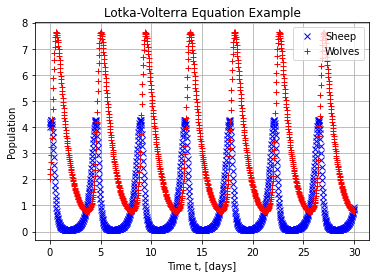

In [11]:
# MODEL PARAMETERS
alpha = 3.
beta = 1.
delta = 1.
gamma = 1.
x0 = 4.
y0 = 2.

# setting up the ordinary differential equations

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

# setting up the time steps

Nt = 1000 # the number of points to select
tmax = 30. # the maximum time step
t = np.linspace(0.,tmax, Nt) # thus, generate 1000 points between 0 and 30 and use these as time points

# set up the initial conditions of the model
X0 = [x0, y0]

# use scipy to integrate the differential equations, given the starting condition, time, and model parameters
res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))

# extract the resulting values from the integration process
x, y = res.T

# visualise these
plt.figure()
plt.grid()

# add labels to the image
plt.title("Lotka-Volterra Equation Example")
plt.plot(t, x, 'xb', label = 'Sheep')
plt.plot(t, y, '+r', label = "Wolves")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

### Phase portrait

Rather than showing the populations themselves, we can show how the trajectory of movement changes over time, showing the system returning to the same state in a cyclical fashion.

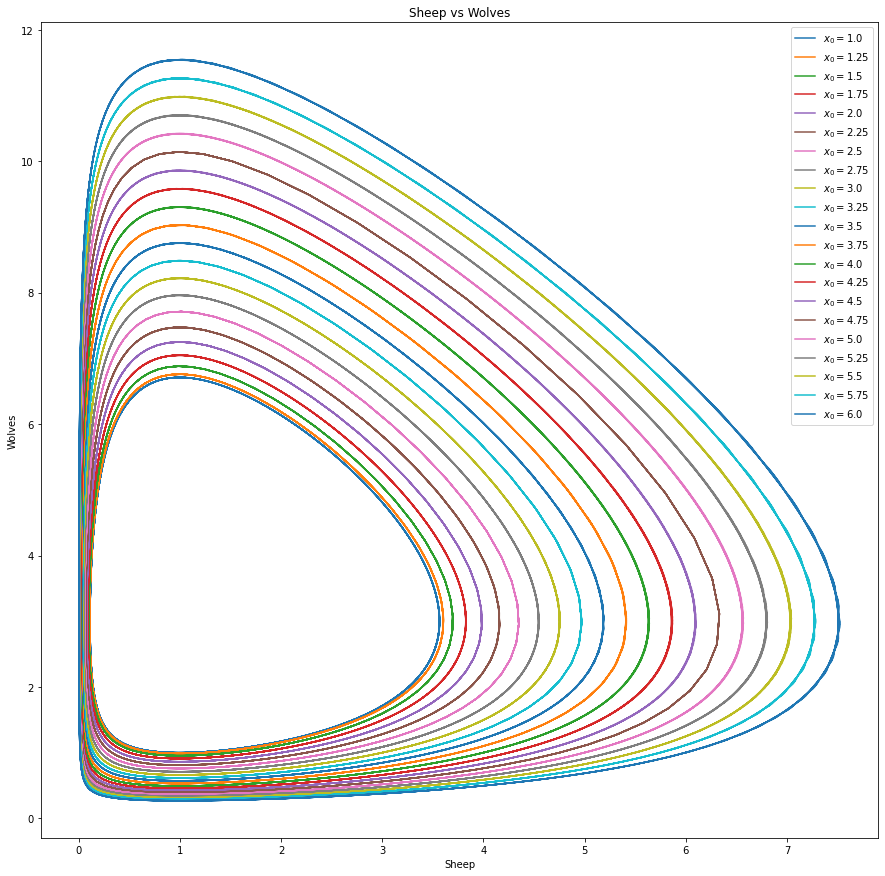

In [12]:
fig = plt.figure()
fig.set_figwidth(15)
fig.set_figheight(15)

# set up the initial conditions for the deer/prey population
IC = np.linspace(1.0, 6.0, 21) # generate 21 points between 1 and 6

# iterate over this set of possible deer population start points
for sheep in IC:
    X0 = [sheep, 1.0] # set up new initial conditions
    
    # run and plot this new scenario
    Xs = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
    plt.plot(Xs[:,0], Xs[:,1], "-", label = "$x_0 =$"+str(X0[0]))
    
# add labels to image
plt.xlabel("Sheep")
plt.ylabel("Wolves")
plt.legend()
plt.title("Sheep vs Wolves");


## Wolf Sheep

A raw python implementation of the wolf-sheep model - in case you don't want to use the scipy integration function!

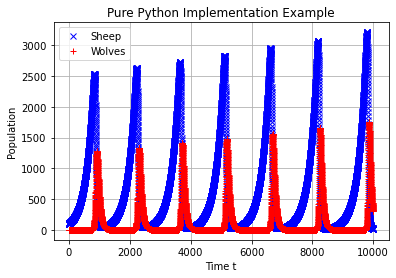

In [5]:
# population growth parameters
sheep_birthrate = .04
wolf_predation_rate = .0003
predator_efficiency = .8
wolf_death_rate = 0.15

# initial populations
sheep_pop = 100
wolf_pop = 5

# historical record of populations
sheep_pop_history = [sheep_pop]
wolf_pop_history = [wolf_pop]

# simulation control parameters
time_to_run = 10000
dt = .1

# running the simulation
for i in range(time_to_run):
    
    # some are born
    sheep_born = max(0, sheep_pop * sheep_birthrate * dt)
    wolves_born = max(0, wolf_pop * predator_efficiency * wolf_predation_rate * sheep_pop * dt)
    
    # some die
    sheep_died = max(0, sheep_pop * wolf_predation_rate * wolf_pop * dt)
    wolves_died = max(0, wolf_pop * wolf_death_rate * dt)
    
    # update the total populations
    sheep_pop += sheep_born - sheep_died
    wolf_pop += wolves_born - wolves_died
    
    # record the values
    sheep_pop_history.append(sheep_pop)
    wolf_pop_history.append(wolf_pop)

# cast the records so they can be easily visualised
sheep = np.array(sheep_pop_history)
wolves = np.array(wolf_pop_history)

# visualise these
plt.figure()
plt.grid()

# add labels to the image
plt.title("Pure Python Implementation Example")
plt.plot(sheep, 'xb', label = 'Sheep')
plt.plot(wolves, '+r', label = "Wolves")
plt.xlabel('Time t')
plt.ylabel('Population')
plt.legend()

plt.show()

# Wolf Sheep Microsimulation Model

What does a microsimulation approach to this problem look like, then?

Consider more interesting examples, eg a microsimulation-based approach to studying the impact of [different tax-benefit public policy choices in the UK](https://github.com/PolicyEngine/policyengine-uk).

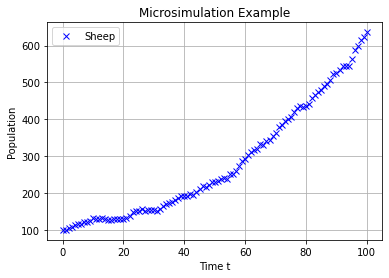

In [7]:
# object to hold Sheep info
class Sheep:
    age = 0
    sex = 0
    
# model parameters
numSheep = 100
chance_of_predation = .03 # likelihood any given sheep is eaten
chance_sheep_gives_birth = .05 # likelihood any given (female) sheep gives birth

# INITIALISING THE MODEL

# create sheep
mySheep = []
for i in range(numSheep):
    s = Sheep()
    s.age = int(np.random.uniform(10)) # between the ages of 1 and 10
    s.sex = int(np.random.uniform(2))
    mySheep.append(s)
    
# RUNNING THE MODEL

# iterate over time
time_to_run = 100
sheep_record = [numSheep]
for i in range(time_to_run):
    
    # holders to help remove and add Sheep
    sheepToKill = []
    sheepToAdd = []
    
    # update status of each Sheep
    for s in mySheep:

        # Sheep always age
        s.age += 1
        
         # may be eaten by wolf
        if np.random.uniform() < chance_of_predation:
            sheepToKill.append(s)
            
        # female sheep may give birth
        elif s.sex == 1 and np.random.uniform() < chance_sheep_gives_birth: 
            s_child = Sheep()
            s_child.sex = int(np.random.uniform(2))
            sheepToAdd.append(s_child)
    
    # update the population of Sheep
    mySheep = [s for s in mySheep if s not in sheepToKill] # delete eaten sheep
    mySheep.extend(sheepToAdd) # add newborn sheep

    # save the current population to the record
    sheep_record.append(len(mySheep))
    

# GRAPH THE RESULTS
    
sheep = np.array(sheep_record)

# visualise these
plt.figure()
plt.grid()

# add labels to the image
plt.title("Microsimulation Example")
plt.plot(sheep, 'xb', label = 'Sheep')
plt.xlabel('Time t')
plt.ylabel('Population')
plt.legend()

plt.show()

## What happens when we run this model multiple times?

Does it vary? Why or why not?

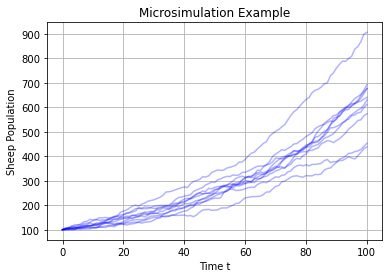

In [8]:
# object to hold Sheep info
class Sheep:
    age = 0
    sex = 0

def run_sheep_microsim():
    
    # model parameters
    numSheep = 100
    chance_of_predation = .03 # likelihood any given sheep is eaten
    chance_sheep_gives_birth = .05 # likelihood any given (female) sheep gives birth

    # INITIALISING THE MODEL

    # create sheep
    mySheep = []
    for i in range(numSheep):
        s = Sheep()
        s.age = int(np.random.uniform(10)) # between the ages of 1 and 10
        s.sex = int(np.random.uniform(2))
        mySheep.append(s)

    # RUNNING THE MODEL

    # iterate over time
    time_to_run = 100
    sheep_record = [numSheep]
    for i in range(time_to_run):

        # holders to help remove and add Sheep
        sheepToKill = []
        sheepToAdd = []

        # update status of each Sheep
        for s in mySheep:

            # Sheep always age
            s.age += 1

             # may be eaten by wolf
            if np.random.uniform() < chance_of_predation:
                sheepToKill.append(s)

            # female sheep may give birth
            elif s.sex == 1 and np.random.uniform() < chance_sheep_gives_birth: 
                s_child = Sheep()
                s_child.sex = int(np.random.uniform(2))
                sheepToAdd.append(s_child)

        # update the population of Sheep
        mySheep = [s for s in mySheep if s not in sheepToKill] # delete eaten sheep
        mySheep.extend(sheepToAdd) # add newborn sheep

        # save the current population to the record
        sheep_record.append(len(mySheep))
    
    return np.array(sheep_record)

# GRAPH THE RESULTS

sheepSweep = []
for i in range(10):
    sheepSweep.append(run_sheep_microsim())

# visualise these
plt.figure()
plt.grid()

# add labels to the image
plt.title("Microsimulation Example")
for run in sheepSweep:
    plt.plot(run, 'b', alpha=.3)
plt.xlabel('Time t')
plt.ylabel('Sheep Population')

plt.show()